In [1]:
from invivo.invivo_analyzer import InVivoAnalyzer
import matplotlib.pyplot as plt
plt.style.use('~/hkb-lab.mplstyle')  # Replace with the correct path


In [2]:
path = "example_studylog_e546.xlsx"
path = "example_studylog_e627.xlsx"

# Auto Ingest Data

In [3]:
analyzer = InVivoAnalyzer(data_path=path)
analyzer.set_group_names(group_names=["CAR Homo (G1)", "CAR Hetero (G2)", "CAR WT (G3)", "UT WT (G4)"])


Initializing InVivoAnalyzer with data from: example_studylog_e627.xlsx
found bodyweight data in sheet `Data BW`
found mortality data in sheet `Data MO`
found tumor volume data in sheet `Data TV-R`
Automatically parsing data from the sheets mentioned above.
The earliest date in the data is 2025-03-24 00:00:00. Treating this as the start of the experiment.
To override, call `self.set_study_start_date()` with a datetime object.
Found the following groups with the following sizes:
   Group ID  Number of Animals
0         1                  7
1         2                  7
2         3                  7
3         4                  7
You can assign names to the groups by calling `self.set_group_names()` with an ordered list of group names.
renaming group 1 to CAR Homo (G1)
renaming group 2 to CAR Hetero (G2)
renaming group 3 to CAR WT (G3)
renaming group 4 to UT WT (G4)
The groups have been renamed to:
          Group ID  Number of Animals
0  CAR Hetero (G2)                  7
1    CAR Homo

/Users/hbhargava/Drive/Projects/Code/invivo/invivo/io.py:95: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tumor_volume_df['Recorded Time'] = pd.to_datetime(tumor_volume_df['Recorded Time'])
/Users/hbhargava/Drive/Projects/Code/invivo/invivo/invivo_analyzer.py:103: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'CAR Homo (G1)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.master_data.loc[self.master_data['Group ID'] == original_id, 'Group ID'] = new_name


# Plot Survival Curves

Survival curves are calculated from the Mortality Observations (`Data MO`) sheet.

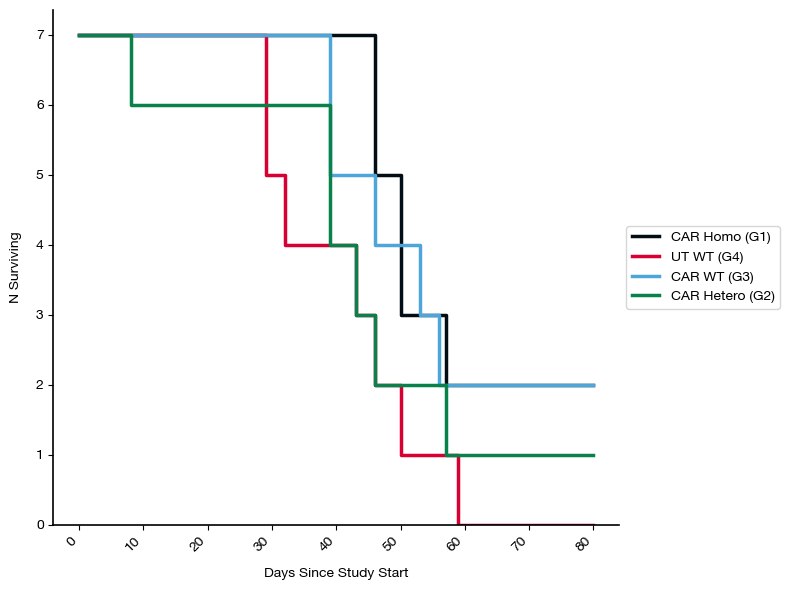

In [4]:
analyzer.plot_survival_curves()

In [5]:
analyzer.master_data['Data Type'].unique()

array(['Bodyweight', 'Tumor Volume Data TV-R', 'Mortality'], dtype=object)

/Users/hbhargava/Drive/Projects/Code/invivo/invivo/invivo_analyzer.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = df['Value'].astype(float)


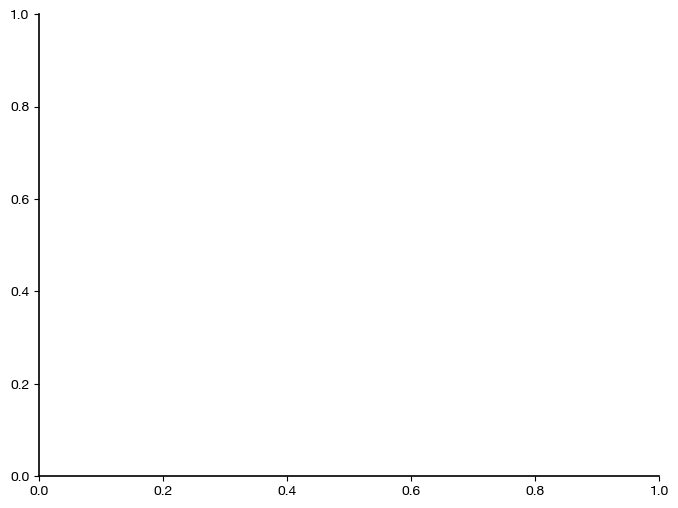

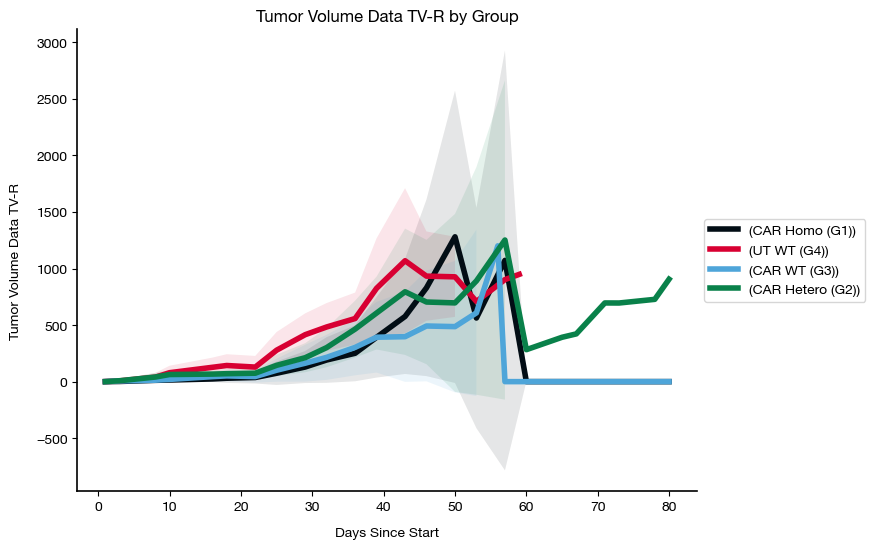

In [6]:
analyzer.plot_data_bygroup('Tumor Volume Data TV-R')

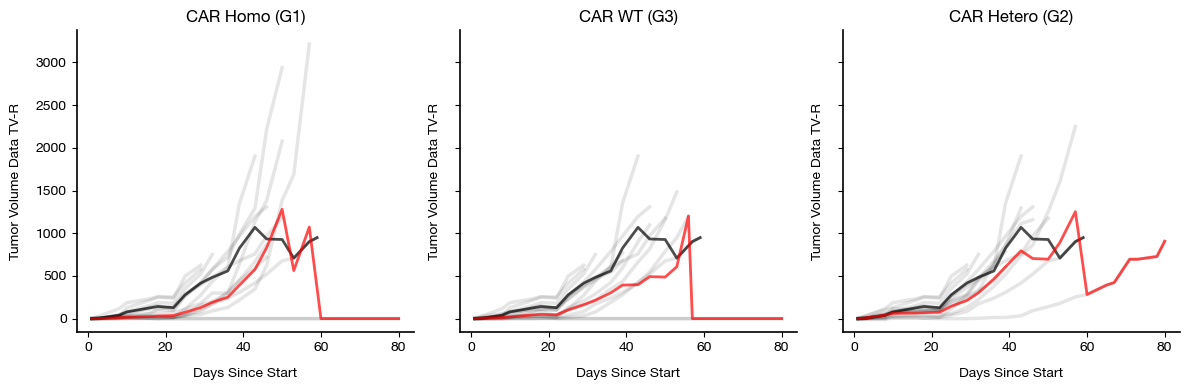

In [7]:
analyzer.subplot_data_bygroup('Tumor Volume Data TV-R', control_group_id='UT WT (G4)')